In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd

In [9]:
mexico = pd.read_csv('data/covidmxraw.csv', skiprows=7)
mexico = mexico[:-3]
mexico = mexico[['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']]
mexico = mexico.rename(columns={'Unnamed: 1': 'Estado', 'Unnamed: 2': 'Sexo', 'Unnamed: 3': 'Edad'})
mexico.to_csv('data/covidmx.csv')
mexico

,Estado,Sexo,Edad
0,CIUDAD DE MÉXICO,M,35.0
1,SINALOA,M,41.0
2,CIUDAD DE MÉXICO,M,59.0
3,COAHUILA,F,20.0
4,CHIAPAS,F,18.0
...,...,...,...
1683,CIUDAD DE MÉXICO,F,34.0
1684,CIUDAD DE MÉXICO,M,70.0
1685,CIUDAD DE MÉXICO,M,73.0
1686,CIUDAD DE MÉXICO,M,73.0


In [28]:
df = pd.read_csv('data/covidworld.csv')
df = df.drop('SNo', axis=1)
def get_country(country_name):
    data = df[df['Country/Region']==country_name]
    country = data.groupby('ObservationDate')
    country = country.sum()[1:]
    return country

mxts = get_country('Mexico')
mxts 

,Confirmed,Deaths,Recovered
ObservationDate,,,
02/28/2020,1.0,0.0,0.0
02/29/2020,4.0,0.0,0.0
03/01/2020,5.0,0.0,0.0
03/02/2020,5.0,0.0,0.0
03/03/2020,5.0,0.0,1.0
03/04/2020,5.0,0.0,1.0
03/05/2020,5.0,0.0,1.0
03/06/2020,6.0,0.0,1.0
03/07/2020,6.0,0.0,1.0


Province/State  Confirmed
Observation date                              
02/28/2020        CIUDAD DE MÉXICO           1
02/29/2020        CIUDAD DE MÉXICO           2
02/29/2020                COAHUILA           1
02/29/2020                 SINALOA           1
03/01/2020                 CHIAPAS           1


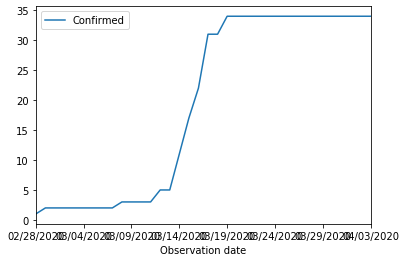

In [77]:
statests = pd.DataFrame()
for i in range(0,mxts['Confirmed'].size):
    upbound = mxts['Confirmed'][i].astype(int)
    states = mexico[:upbound].groupby('Estado')
    states = states['Estado'].count()
    day = pd.DataFrame(index=np.repeat(mxts.index[i],mexico[:upbound]['Estado'].unique().size))
    day['Province/State'] = states.index.values
    day['Confirmed'] = states.values
    statests=statests.append(day)
    # np.repeat(mxts.index[i],mexico['Estado'].unique().size)
#     day = mexico[:int(number)]
statests.index.name='Observation date'
print(statests.head())
cdmx = statests.groupby('Province/State').get_group('CIUDAD DE MÉXICO ')
cdmx.plot()
#     break;

In [12]:
states = mexico.groupby('Estado')
infected = states['Estado'].count()
infected = infected.rename({'CIUDAD DE MÉXICO ': 'DISTRITO FEDERAL', 'MÉXICO ': 'MEXICO', 'NUEVO LEÓN ':'NUEVO LEON', 'SAN LUIS POTOSÍ ':'SAN LUIS POTOSI'})
infected = infected.sort_index()
infected.to_csv('data/infected.csv')
infected 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """


Estado
AGUASCALIENTES       1
CHIAPAS              1
CHIHUAHUA            1
COAHUILA             1
DISTRITO FEDERAL    34
DURANGO              3
GUANAJUATO           1
GUERRERO             2
JALISCO              6
MEXICO              15
NUEVO LEON          19
OAXACA               2
PUEBLA               8
QUERETARO            7
QUINTANA ROO         4
SAN LUIS POTOSI      2
SINALOA              2
SONORA               1
TAMAULIPAS           1
YUCATÁN              7
Name: Estado, dtype: int64

In [13]:
states = gpd.read_file('data/geopandas/states.shp')
infected = pd.read_csv('data/infected.csv',header=None)
infected = infected.set_index(0)
infected.index=states.index
states['infected'] = infected
states.to_file('data/geopandas/states.shp')

ValueError: Length mismatch: Expected axis has 20 elements, new values have 32 elements

In [14]:
# path = 'data/PHLITL_2000.shp'
# data = gpd.read_file(path)
# counties = data[['EDO_LEY', 'geometry']]
# states = counties.dissolve(by='EDO_LEY')
# states = states.sort_index()